
# Representing and Manipulating Data


# An analysis of the book, Around the World in 80 Days by Jules Verne


The text of the book - it is called aroundTW80Days.txt.


### Other Notes


- The output is visible without the need to run the code again


## Open the file `aroundTW80Days.txt` and read its contents into a string


- Printing the number of characters (letters, etc) in the whole book
- Splitting the book into a Python list containing all the words of the book in order. At this stage, use string splitting, not a more fancy library like `nltk`. Call this variable `book_list`
- Printing the number of words in the book
- Printing the first 10 words of the book. It should look like this:

`['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Around', 'the', 'World', 'in', '80', 'Days,']`

In [72]:
# Open the file in read mode and save the content in string 'file_content'
with open('aroundTW80Days.txt','r') as fid:
    file_content = fid.read()

# Print the characters in the file, considering also spaces and new lines
print(f"There are {len(file_content)} characters in the book.")

# Split the book into words using the space character as separator and replace extra newline characters \n with " "
book_list = file_content.replace('\n', ' ').split(" ")

# Print the number of words in the book and an example of the first 10 words
print(f"There are {len(book_list)} words in the book.")
print(f"There first 10 words in the book are: {book_list[:10]}.")

There are 390222 characters in the book.
There are 70796 words in the book.
There first 10 words in the book are: ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Around', 'the', 'World', 'in', '80'].


## Create a set containing all the unique words in the book
- Print the number of unique words it finds

In [73]:
# Convert the list into a set and count the unique words. 
# Words are transformed into lowercase so not to make the count case sensitive.
book_list_lowercase = [word.lower() for word in book_list]
book_set = set(book_list_lowercase)
print(f"There are {len(book_set)} unique words in the book.")

There are 11859 unique words in the book.


## Build a Dictionary of the words used in the book
- Build a Python dictionary (`dict`) in which the keys are the unique words in the book and the values are dictionary objects with fields `length` for word length and `freq` for frequency, e.g.:

`{'the': {'length': 3, 'freq': 4303}}`


In [74]:
# Create an empty dictionary, iterate the words list, and create a new entry if the 
#   key does not exist, otherwise increment the frequency object.
# Words are considered as lowercase so not to make the count case sensitive.
book_dict = {}
for word in book_list_lowercase:
    if word not in book_dict:
        book_dict[word] = {'length': len(word), 'freq': 1}
    else:
        book_dict[word]['freq'] += 1

## The dictionary that has been created above is used to find the most commonly used word in the book
- Print the word and the number of times it appeared in the book

In [75]:
# Initialize two variables with the current max frequency and words.
# Iterate each key and compare the word frequency with the current max.
# If the frequency is greater updates the max frequency and initialize a new max words array,
# otherwise, if equal, append the max word.
max_frequency = 0
max_words = []
for word in book_dict.keys():
    frequency = book_dict[word]['freq']
    if frequency > max_frequency:
        max_frequency = frequency
        max_words = [word]
    elif frequency == max_frequency:
        max_words.append(word)

print(f"The word/s with max frequency {max_frequency} is/are {max_words}.")

The word/s with max frequency 4850 is/are ['the'].


## A generator function to produce each word and its length each time it yields a value

- The function accepts a single argument: the list of words in the book
- It yields a tuple (word, word_len)
- The function is called to create a generator (no iterations over it at this stage)

In [76]:
# The function takes as input a list of words and returns a generator that yields tuples of (word, word_len).
def words_gen(words_list):
    for word in words_list:
        yield (word, len(word))
        
# Create a generator.
generator = words_gen(book_list_lowercase)

## A comprehension over the generator I just made to list all the words with 9 letters

- Print all those words

In [77]:
# Select all words with lenght 9 and wrap into a set so to get distinct values.
nine_letters_words = [word for word, length in generator if length == 9]
nine_letters_words = list(set(nine_letters_words))

print(f"Words with 9 letters: {nine_letters_words}")

Words with 9 letters: ['belonging', 'symbolise', 'extending', 'specified', 'convulsed', 'dexterous', 'colonise.', 'nagasaki,', 'amusement', 'westward,', 'distress.', 'warranty,', 'mongolia;', 'inanimate', 'profiting', 'regularly', 'subjects;', 'dutchmen,', 'concealed', 'peninsula', 'excessive', 'paralytic', 'accoutred', 'trickery.', 'stationed', 'certainly', 'listener.', 'calmness.', 'stations.', 'congress.', 'nicholas,', 'speaking,', 'flurried,', 'constant.', 'territory', 'railway."', 'disappear', 'streamers', 'goodness;', 'expanding', 'preparing', 'fantastic', 'domicile.', 'weathered', 'batulcar.', 'francisco', 'regarding', 'well-used', 'proposed,', 'locations', 'directed.', 'teakwood,', 'readiness', 'anxious."', 'grimaces,', 'flanagan,', '"monday,"', 'hypertext', '"terribly', 'unloading', 'cushions.', 'stories,"', 'atlantic.', 'calcutta.', 'evidently', 'shoeless,', 'indians?"', 'narcotic,', 'powdering', 'confidant', 'interest,', 'district,', 'dispersed', 'treatment', 'scattered', 'o

## Iterations over the original list of words, `book_list` and finding all the words with more than 14 letters, which do not contain any of these characters:

`. - \ /`

In [78]:
# Create a new generator.
generator = words_gen(book_list_lowercase)

# List of the characters to exclude.
chars_to_exclude = [".", "-", "\\", "/"]

# Lambda function for checking if the a word contains any of chars_to_exclude.
contains_char = lambda s: any(char in s for char in chars_to_exclude)

# Filter words with comprehension.
over_14_letters_words = [word for word, length in generator if length > 14 and not contains_char(word)]
over_14_letters_words = list(set(over_14_letters_words))

## Splitting the book into a list of chapters
 
 - This will be a list of strings
 - Note: I split on the word 'Chapter'
 - Calling the list `chapter_list`
 

In [79]:
# Split the file content with the separator "Chapter"
chapter_list = file_content.split("Chapter")

## Remove the first entry from the chapter list 
The first item in the chapter list is just the preface and chapter list. I copy that into a separate string variable and then remove it from the chapter list.

In [80]:
# Copy the first element of the list into preface, and keep all the others into chapter_list
preface = chapter_list[0]
chapter_list = chapter_list[1:]

## Splitting each chapter of the book into a list of words, producing a list of lists - one for each chapter

In [81]:
# Use comprehension for splitting each chapter in the list into a list of words.
chapters_words_list = [chapter.split(" ") for chapter in chapter_list]

## Print only the titles from each chapter
- Note: The title of each chapter is written in UPPER CASE and is the first thing in each chapter. Therefore, printing words until you find one that is not upper case will print the title.

In [82]:
# Get titles' list from the preface.
chapter_titles = preface.split("CHAPTER")[1]

# Split by double new line
chapter_titles_list = chapter_titles.split("\n\n")

# Remove multiple spaces and the chapter number.
chapter_titles_list = [" ".join(chapter.split()[1:]) for chapter in chapter_titles_list if chapter is not "\n" and chapter is not ""]

print(f"The chapters' titles are: {chapter_titles_list}")

The chapters' titles are: ['IN WHICH PHILEAS FOGG AND PASSEPARTOUT ACCEPT EACH OTHER, THE ONE AS MASTER, THE OTHER AS MAN', 'IN WHICH PASSEPARTOUT IS CONVINCED THAT HE HAS AT LAST FOUND HIS IDEAL', 'IN WHICH A CONVERSATION TAKES PLACE WHICH SEEMS LIKELY TO COST PHILEAS FOGG DEAR', 'IN WHICH PHILEAS FOGG ASTOUNDS PASSEPARTOUT, HIS SERVANT', "IN WHICH A NEW SPECIES OF FUNDS, UNKNOWN TO THE MONEYED MEN, APPEARS ON 'CHANGE", 'IN WHICH FIX, THE DETECTIVE, BETRAYS A VERY NATURAL IMPATIENCE', 'WHICH ONCE MORE DEMONSTRATES THE USELESSNESS OF PASSPORTS AS AIDS TO dETECTIVES', 'IN WHICH PASSEPARTOUT TALKS RATHER MORE, PERHAPS, THAN IS PRUDENT', 'IN WHICH THE RED SEA AND THE INDIAN OCEAN PROVE PROPITIOUS TO THE DESIGNS OF PHILEAS FOGG', 'IN WHICH PASSEPARTOUT IS ONLY TOO GLAD TO GET OFF WITH THE LOSS OF HIS SHOES', 'IN WHICH PHILEAS FOGG SECURES A CURIOUS MEANS OF CONVEYANCE AT A FABULOUS PRICE', 'IN WHICH PHILEAS FOGG AND HIS COMPANIONS VENTURE ACROSS THE INDIAN FORESTS, AND WHAT ENSUED', 'IN WH

## Measure the length of each chapter and plot the values on a bar chart
- Drawing a horizontal bar chart so can be read the chapter numbers down the left side
- Setting the headings to be `Chapter I` to `Chapter XXXVI` doing this with code that extracts the chapter headings from the text
- Giving the chart appropriate title and axis labels
- Matplotlib is used.

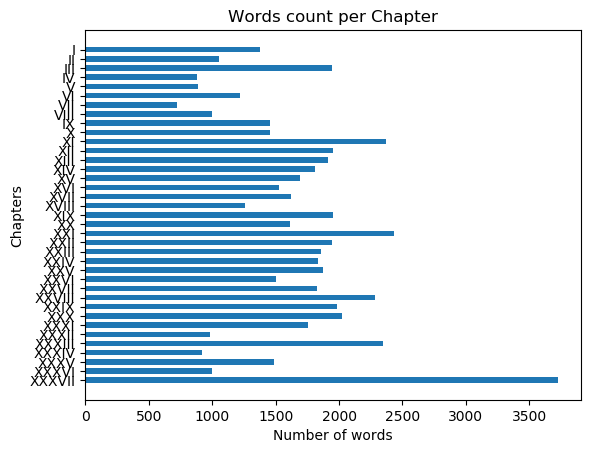

In [83]:
# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Create a list of tuples with (Chapter number, Chapter size)
chapters_length = [(chapter[1].split("\n\n")[0], len(chapter)) for chapter in chapters_words_list]

chapters = [val[0] for val in chapters_length]
number_of_words = [val[1] for val in chapters_length]

# Display the Bar Chart
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(range(len(chapters_length)), number_of_words, align='center', height=.6)
ax.set_ylabel('Chapters')
ax.set_yticks(range(len(chapters_length)))
ax.set_yticklabels(chapters)
ax.invert_yaxis()
ax.set_xlabel('Number of words')
ax.set_title('Words count per Chapter')

plt.show()

## Plotting Locations Mentioned in the Book on a Map

- Plotting the locations of all the cities mentioned in the book
- There is available an extra file called `cities.txt` to look up city names and locations
- Looking at its contents to work out how to use it. The locations are given as latitude, longitude, altitude.
- Searching the book for all the cities in `cities.txt`. Any that it finds is plotted on the map
- Info: a useful list of words that appear in the book, but are NOT to be plotted:

`['Victoria','San','Imperial','Come','San Pablo','Queenstown','Young','Lincoln','Forster','Formosa']`

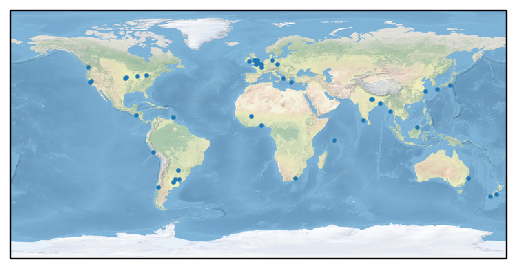

In [84]:
# Import cartopy, matplotlib and pandas
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd 

# Read the file with the cities to exclude into a Pandas dataframe
locations = pd.read_csv("cities.txt", 
                   sep=";", 
                   header=None, 
                   names=["ID", "Country", "City", "Latitude", "Longitude", "Altitude"]
                  ) 

# Filter for the cities that are mentioned in the book (using the list of words)
locations_filtered = locations[locations["City"].isin(book_list)]

# Print the map and the coordinates of the cities
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(locations_filtered["Longitude"], 
            locations_filtered["Latitude"],
            #color='blue', 
            marker='o',
            s=5
         )

## NLTK Sentiment Analysis

## Using VADER tool in the nltk library to analyse the sentiment of each chapter and plot the positive sentiment level over time on a chart

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stella/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[0.123, 0.118, 0.082, 0.091, 0.085, 0.083, 0.077, 0.085, 0.091, 0.103, 0.091, 0.093, 0.085, 0.178, 0.08, 0.112, 0.125, 0.109, 0.114, 0.119, 0.123, 0.084, 0.135, 0.122, 0.133, 0.091, 0.106, 0.084, 0.112, 0.095, 0.115, 0.093, 0.093, 0.097, 0.117, 0.097, 0.12]


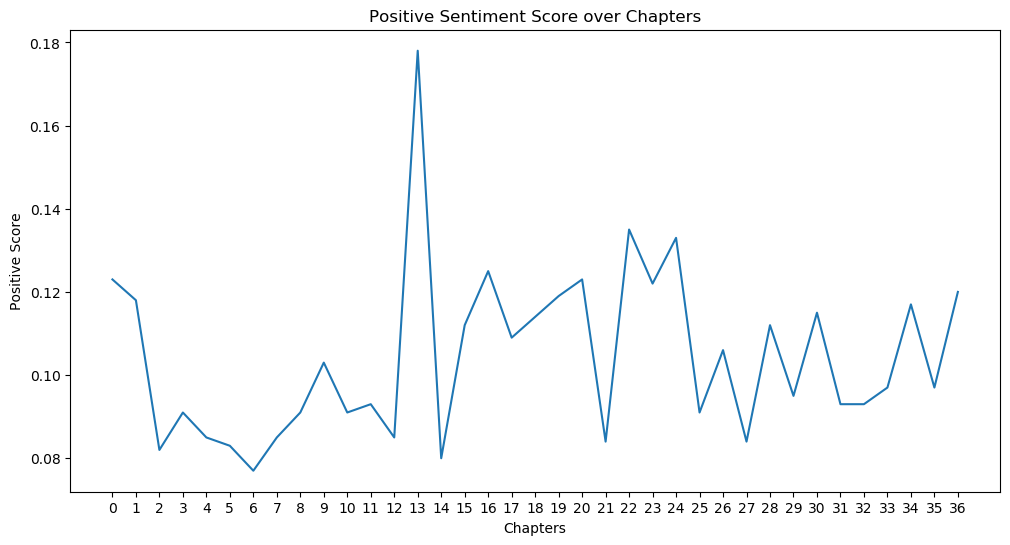

In [100]:
# Import the nltk and Vader's SentimentIntensityAnalyzer. Also download the vader_lexicon is does not exist alreaday
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# Calculate the polarity scores for each chapter and select the positive score
chapter_sentiment = [analyser.polarity_scores(chapter)['pos'] for i, chapter in enumerate(chapter_list)]

# Plot how the positive sentiment level evolves throughout the book 
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(chapter_sentiment)
ax.set_ylabel('Positive Score')
ax.set_xlabel('Chapters')
ax.set_xticks(range(len(chapter_sentiment)))
ax.set_title('Positive Sentiment Score over Chapters')
plt.show()

## Ideas and Inspiration for continuing my work: Some further analysis that could be done based on the text of this book 

Other data sources may be used to tell an additional story around the data. Suggested data and sources include:

- Travel and accommodation sites
- User reviews of the book
- Book sales data about this and other related books
- News stories about places in the book
- Travel times and distances
- Pictures of places in the book

#### Food for thought: 

How Phileas Fogg would travel if he had to make the same journey today - what would it cost, where might he stay, what would be happening in the places he would visit? How we would aquire the data we need? Consider connecting to data online using REST. Is there need to perform scraping with something like ScraPy? Think of other packages that would aid the analysis - what would be used for?

Ideas including data sources, Python packages used, presentation and visualisation methods, and potential problems that might appear. 


## Below I show some work, ideas and approaches that I have done in the topics discussed above.

# How this travel could be organized with today's technology

## Idea

- Collect weather data for each location so to visit a city when conditions are better
- Optimize the number of days to spent in a city based on its size and number of attractions
- Plan travels through all the cities by using online travel search engines

## Methodology

### Background

We have a dataset containing a list of cities that have been mentioned in the book.

### Weather Data

Weather data can be collected either as a dataset or API. [AccuWeather](https://enterprisesolutions.accuweather.com/current-historical-weather/historical-weather) offers enterprise access to the most accurate, complete and robust record of past weather. Alternatively, free datasets can be found online, e.g. Wikipedia (in this case ScraPy could be used for downloading tabular data from the website). 

In the case of API, a useful Python package to use could be *requests* - authentication is supported. It allows to make call to a remote service and collect data.

Example:
`
import requests
r = requests.get('https://api.github.com/user', auth=('user', 'pass'))
r.status_code
`

### Lenght of staying

The length of staying could be calculated based on the size of the city and the number of its attractions. [Foursquare](https://foursquare.com) is one of the largest online databases for location discovery and venue search. They offer all this information through the [Foursquare Developer Platform](https://developer.foursquare.com); data are given via flat file or API. 

Foursquare also offers information on visitors and their feedback. This could be used as a weight for the places: locations with more visitors or better feedback could lead to a longer stay.

Additionally, information regarding the size of the city can be collected from Wikipedia.

### Travel planning

[Skyscanner](https://partners.skyscanner.net/affiliates/travel-apis) is one of the most important travel search engines. It allows API access to their searching services and returns different travel options for flights and car rentals. Their system requires an API key to allow access to the APIs.

Flights Browse Prices can be searched with:
`/browsequotes/v1.0/{country}/{currency}/{locale}/{originPlace}/{destinationPlace}/{outboundPartialDate}/{inboundPartialDate}`

Response can be either *application/json* or *application/xml*.

Skyscanner offers, similarly, live prices and booking options for car hires and hotels.

### Composition

This data can be stored into pandas dataframes and joined together. A few parameters could be utilized for optimizing the route to follow and the connections between the cities. 

The weather data can suggest what's the best month of the year for visiting a specific place. Attractions data can define what should be the length of stay. And finally, the travel search engine could optimize the route given the two parameters as input.